[['SUP210']
 ['SUP173']
 ['SUP162']
 ...
 ['SUP302']
 ['SUP252']
 ['SUP155']]
No of  year 3
No of Months 12
No of Active  Customers 225
No of Bills 943
No of Payments 794
No of Billing_Index  1097
No of Collection_Index 1292
No of Bill_Amount_(NGN) 1311
No of Collection_Amount_(NGN) 1298
No of Collection_Efficiency  1311
No of KwH_CONSUMPTION 1309
No of CSP_CODE 97
      Year Month  Active Customers  No of Bills  No of Payments  \
0     2017   Aug               675          821               1   
1     2017   Aug              1603         2707               1   
2     2017   Sep               622         1265               1   
3     2016   Dec               297         1152               1   
4     2017   Aug               622         1265               2   
...    ...   ...               ...          ...             ...   
1306  2016   Oct              2288          151             208   
1307  2017   Feb               402          264             168   
1308  2017   Feb             

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


TRAINING CLASSIFICATION REPORT
                      precision    recall  f1-score   support

             AVERAGE       1.00      1.00      1.00        44
           EXCELLENT       1.00      1.00      1.00        15
FAIRLY_ABOVE_AVERAGE       1.00      1.00      1.00        33
FAIRLY_BELOW_AVERAGE       1.00      1.00      1.00        88
         FAIRLY_GOOD       1.00      1.00      1.00        30
                GOOD       1.00      1.00      1.00        16
                 LOW       1.00      1.00      1.00       186
               LOWER       1.00      1.00      1.00       341
              LOWEST       1.00      1.00      1.00       282
           VERY GOOD       1.00      1.00      1.00        14

            accuracy                           1.00      1049
           macro avg       1.00      1.00      1.00      1049
        weighted avg       1.00      1.00      1.00      1049

TESTING CLASSIFICATION REPORT
                      precision    recall  f1-score   support

     

<AxesSubplot:>

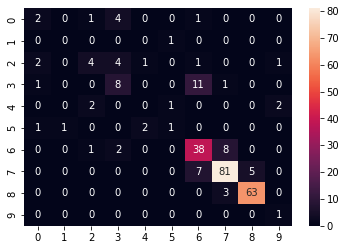

In [3]:
import xgboost as xgb
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import minmax_scale 
from sklearn.metrics import classification_report
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

import  time 
t = time.time()


dataset = pd.read_csv('NT_DATA_2.csv', header = 0, delim_whitespace=False, index_col=None) #read data  

df = pd.DataFrame(dataset) #convert  to  a  dataframe

# data_description
year = len(np.unique(df.iloc[:, [0]]))
Month = len(np.unique(df.iloc[:, [1]]))
Active_Customers  = len(np.unique(df.iloc[:, [2]]))
No_of_Bills  = len(np.unique(df.iloc[:, [3]]))
No_of_Payments  = len(np.unique(df.iloc[:, [4]]))
Billing_Index = len(np.unique(df.iloc[:, [5]]))
Collection_Index = len(np.unique(df.iloc[:, [6]]))
Bill_Amount_NGN =len(np.unique(df.iloc[:, [7]]))
Collection_Amount_NGN = len(np.unique(df.iloc[:, [8]]))
Collection_Efficiency = len(np.unique(df.iloc[:, [9]]))
KwH_CONSUMPTION = len(np.unique(df.iloc[:, [10]]))
CSP_CODE = len(np.unique(df.iloc[:, [11]]))
#labelencoder = LabelEncoder()
print(np.array(df.iloc[:, [12]]))
#SUPERVISOR_CODE= labelencoder.fit_transform(np.array(df.iloc[:, [12]]))
#SUPERVISOR_CODE = len(np.unique(np.array(df.iloc[:, [12]]) ))

print('No of  year', year)
print('No of Months', Month)
print('No of Active  Customers', Active_Customers )
print('No of Bills', No_of_Bills)
print('No of Payments', No_of_Payments )
print('No of Billing_Index ', Billing_Index )
print('No of Collection_Index', Collection_Index)
print('No of Bill_Amount_(NGN)', Bill_Amount_NGN)
print('No of Collection_Amount_(NGN)',Collection_Amount_NGN)
print('No of Collection_Efficiency ', Collection_Efficiency )
print('No of KwH_CONSUMPTION', KwH_CONSUMPTION)
print('No of CSP_CODE', CSP_CODE)
#print('No of SUPERVISOR_CODE', SUPERVISOR_CODE)

#Define  bins  in percentiles
bins  = [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]

#Rating  of  Collection Efficiency
group_CE = ['LOWEST', 'LOWER', 'LOW', 'FAIRLY_BELOW_AVERAGE', 'AVERAGE', 'FAIRLY_ABOVE_AVERAGE', 'FAIRLY_GOOD', 'GOOD', 'VERY GOOD', 'EXCELLENT' ]

df['CE_RATING'] = pd.cut(df['Collection Efficiency'] , bins, labels=group_CE)

print(df)

#get all categorical columns
cat_columns = df.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

print(df)


k = np.array(df.iloc[:,[13]])

u, c =np.unique(k, return_counts=True)
print(dict(zip(u, c)))


data_X = minmax_scale(df.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12]])
data_X = pd.DataFrame(data_X)
data_y = df.iloc[:,[13]]
print(data_X)
print(data_y)

train_X=data_X.sample(frac=0.80,random_state=100) #20, 40, 50, 80, 100
test_X=data_X.drop(train_X.index)

train_y=data_y.sample(frac=0.80,random_state=100)
test_y=data_y.drop(train_y.index)
print(train_X)
print(train_y)
print(test_X)
print(test_y)


model = xgb.XGBClassifier().fit(train_X, train_y)
train_pred  = model.predict(train_X)
test_pred  = model.predict(test_X)



print('TRAINING CLASSIFICATION REPORT')
print(classification_report(train_y, train_pred))

print('TESTING CLASSIFICATION REPORT')
print(classification_report(test_y, test_pred))


print('TRAINING ACCURACY REPORT')
print(accuracy_score(train_y, train_pred))

print('TESTING ACCURACY REPORT')
print(accuracy_score(test_y, test_pred))

xgboost_tree_matrix =  confusion_matrix(test_y, test_pred)


print('CONFUSION MATRIX IN THE TESTING PHASE')

sns.heatmap(xgboost_tree_matrix, annot=True)





EXPLAINABILITY ON XGBOOST MODEL


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


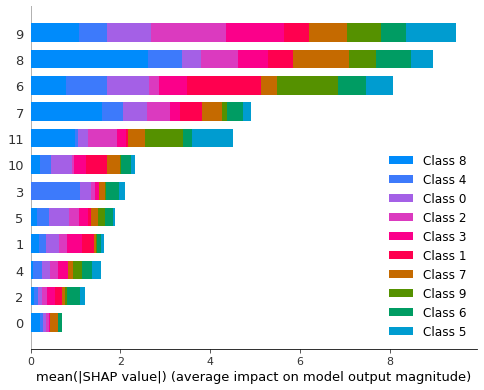

Elapsed Time is : 2.64831662 seconds 


In [4]:
print('EXPLAINABILITY ON XGBOOST MODEL')

# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_X)
expected_value = explainer.expected_value


############## visualizations #############
# Generate summary bar plot
shap.summary_plot(shap_values, test_X,title="SHAP summary plot") 


elapsed = time.time() - t

print('Elapsed Time is : %.8f seconds ' % (elapsed))